# Basics
make sure you have some data in your `example_1k` directory doing an nbody run. See [examples README](https://github.com/kaiwu-astro/Nbody6PPGPU-beijing/tree/stable/examples)

## Reading data from the main stdout file
If you've followed the [examples README](https://github.com/kaiwu-astro/Nbody6PPGPU-beijing/tree/stable/examples), the standard output was redirected into the file `example_1k/1k.out`.

Let's have a look at that file

In [ ]:
with open("example_1k/1k.out","r") as nb_stdout:
    for line in enumerate(nb_stdout):
        print(line[1])
        
# Careful, this will produce quite some output!

## Lagrangian Radii

The main stdout file produces a lot of output. See the [documentation](https://github.com/kaiwu-astro/Nbody6PPGPU-beijing/tree/stable/doc) for more information on what data can be pulled out from the main stdout file.

Let us now extract some data. If you e.g. search for `RLAGR` in the output file, you'll find multiple results like this, giving the Lagragian radii for different mass fractions, and even some more info. Let us now try to extract this data

    TIME   M/MT:  1.00E-03  3.00E-03  5.00E-03  1.00E-02  [...]
    0.0000D+00 RLAGR:   6.27E-02  1.00E-01  1.02E-01  [...]
    0.0000D+00 AVMASS:  7.82E-04  5.23E-04  1.29E-03  [...]
    0.0000D+00 NPARTC:         3         6         7  [...]
    0.0000E+00 SIGR2:   3.62E-02  4.58E+03  1.44E+08  [...]
    0.0000E+00 SIGT2:   7.10E-03  1.21E+03  3.84E+07  [...]
    0.0000E+00 VROT:    2.89E-02  9.31E+00  1.03E+03  [...]

### Reading the data
Start by importing some useful libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
# initialize a pandas DataFrame
df = None

# work through the file
with open("example_1k/1k.out","r") as nb_stdout:
    for line in nb_stdout:
        # Match line where we get the mass fractions
        if re.search("TIME.*M/MT:", line):
            # Replace the multiple spaces by just one space
            line = re.sub("\s+", " ", line).strip()
            # After replacing the multiple spaces we can more easily split the line
            line = line.split(" ")
            # We'll now store our mass fractions as we'll later use them as columns
            cols = [float(i) for i in line[2:len(line)-1]] + [line[len(line)-1]]
            
            # create the DataFrame if it's not done yet
            if df is None:
                df = pd.DataFrame(columns=cols)
        # Match lines with lagragian radii
        elif re.search("RLAGR:", line):
            # Similarly prepare the line, for working with it
            line = re.sub("\s+", " ", line).strip()
            line = line.split(" ")
            
            # We need to replace D by E, since python can not handle D as exponential,
            # after that we set the row at time t by the following values
            df.loc[np.float64(line[0].replace("D","E"))] = np.float64(line[2:])

df         

,0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99,1.0,<RC
0.0,0.0627,0.1000,0.1020,0.1060,0.1580,0.2240,0.296,0.431,0.536,0.667,0.731,0.836,1.04,1.45,2.36,2.90,4.50,6.12,0.2910
1.0,0.0645,0.0831,0.0886,0.1050,0.1510,0.1980,0.243,0.391,0.534,0.624,0.813,0.924,1.04,1.45,2.51,2.87,4.93,6.28,0.1880
2.0,0.0907,0.1060,0.1420,0.1660,0.1960,0.2170,0.239,0.371,0.460,0.606,0.766,0.995,1.35,1.46,2.44,2.86,4.83,6.55,0.2890
3.0,0.0638,0.0784,0.0925,0.1020,0.1260,0.1390,0.273,0.336,0.485,0.643,0.785,1.010,1.35,1.61,2.58,3.02,4.46,6.72,0.2050
4.0,0.0956,0.0983,0.1100,0.1290,0.1350,0.1720,0.216,0.371,0.461,0.595,0.805,1.040,1.55,1.60,2.58,2.98,4.20,6.70,0.2000
5.0,0.0225,0.0411,0.0433,0.0439,0.0443,0.0480,0.162,0.321,0.490,0.668,0.898,1.150,1.34,1.74,2.38,2.97,4.50,6.69,0.0606
6.0,0.0337,0.0398,0.0586,0.0716,0.0737,0.0908,0.132,0.327,0.570,0.770,0.963,1.060,1.36,1.81,2.32,3.12,4.47,6.60,0.0901
7.0,0.0290,0.0346,0.0361,0.0476,0.0611,0.0656,0.153,0.313,0.538,0.657,0.811,1.040,1.35,1.89,2.48,3.35,5.07,6.70,0.0582
8.0,0.0492,0.0573,0.0642,0.0651,0.0722,0.0864,0.103,0.339,0.420,0.621,0.881,1.200,1.60,2.05,3.60,6.84,6.84,6.84,0.1070
9.0,0.0744,0.0855,0.0908,0.0922,0.0960,0.1050,0.136,0.366,0.475,0.697,0.952,1.270,1.58,2.21,3.75,8.11,8.11,8.11,0.1740


### Plotting
This is already a nice table, but let's plot the data

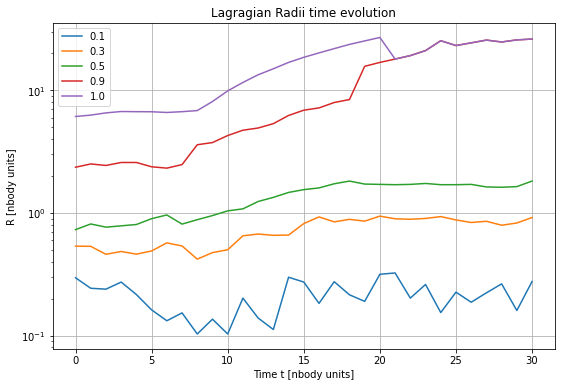

In [3]:
# We don't want it to get too messy, so let's only plot
# a few columns
COLS = [0.1, 0.3, 0.5, 0.9, 1.0]

# Prepare plot
fig = plt.figure(figsize=(9,6))
ax = fig.gca()

# plot
df[COLS].plot(ax=ax)

# make the plot a little bit nicer
ax.set_title(r"Lagragian Radii time evolution")
ax.set_xlabel(r"Time t [nbody units]")
ax.set_ylabel(r"R [nbody units]")
ax.grid()
ax.set_yscale("log")

## Get more information

Let's get more info, we've only slightly modified the code to read the main output file. From the example output above we can also read not only `RLAGR` but also `AVMASS`, `NPARTC`, `SIGR2`, `SIGT2`, and `VROT`

In [4]:
# set lines to analyze
LINES_TO_READ = ["RLAGR", "AVMASS", "NPARTC", "SIGR2", "SIGT2", "VROT"]

# this time, just set the columns manually instead of letting
# the program figure it out for itself.
COLS = [0.001, 0.003, 0.005, 0.01, 0.03, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 1.0, '<RC']

# initialize dataframes to store results in
data = {data_type: pd.DataFrame(columns=COLS) for data_type in LINES_TO_READ}

# work through the file
with open("example_1k/1k.out","r") as nb_stdout:
    for line in nb_stdout:
        # work through all lines that should be read
        for data_type in LINES_TO_READ:
            # match lines with data type
            if re.search(data_type, line):
                # prepare the line, for working with it
                line = re.sub("\s+", " ", line).strip()
                line = line.split(" ")

                # We need to replace D by E, since python can not handle D as exponential,
                # after that we set the row at time t by the following values
                (data[data_type]).loc[np.float64(line[0].replace("D","E"))] = np.float64(line[2:])
                # stop loop cause each line can only have one data type
                break

data["VROT"]

,0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99,1.0,<RC
0.0,0.0289,9.31,1030.0,63400.0,2110000.0,4.210000e+07,3.760000e+08,1.880000e+09,6.250000e+09,1.520000e+10,2.850000e+10,4.730000e+10,6.750000e+10,8.430000e+10,9.370000e+10,9.840000e+10,9.940000e+10,9.940000e+10,-0.01920
1.0,0.5850,186.00,36100.0,1640000.0,53400000.0,1.040000e+09,1.010000e+10,5.070000e+10,1.530000e+11,3.810000e+11,7.460000e+11,1.130000e+12,1.620000e+12,2.020000e+12,2.230000e+12,2.350000e+12,2.370000e+12,2.370000e+12,0.11300
2.0,0.4590,129.00,24400.0,2280000.0,65000000.0,1.240000e+09,1.160000e+10,5.800000e+10,1.930000e+11,4.820000e+11,9.640000e+11,1.610000e+12,2.290000e+12,2.860000e+12,3.180000e+12,3.350000e+12,3.380000e+12,3.380000e+12,0.04530
3.0,-0.6950,-210.00,-41200.0,-3890000.0,-129000000.0,-2.100000e+09,-1.760000e+10,-8.780000e+10,-2.860000e+11,-7.140000e+11,-1.430000e+12,-2.380000e+12,-3.400000e+12,-4.150000e+12,-4.610000e+12,-4.850000e+12,-4.890000e+12,-4.890000e+12,0.18800
4.0,0.0804,16.70,3280.0,129000.0,3590000.0,7.150000e+07,6.220000e+08,3.000000e+09,9.990000e+09,2.500000e+10,4.970000e+10,8.290000e+10,1.060000e+11,1.320000e+11,1.420000e+11,1.490000e+11,1.500000e+11,1.500000e+11,-0.02580
5.0,0.9730,16.90,282.0,4680.0,77400.0,1.280000e+06,1.260000e+07,6.250000e+07,2.080000e+08,5.200000e+08,1.040000e+09,1.730000e+09,2.390000e+09,2.980000e+09,3.250000e+09,3.420000e+09,3.460000e+09,3.460000e+09,0.38300
6.0,0.2170,4.81,107.0,2360.0,51100.0,9.900000e+05,9.590000e+06,4.770000e+07,1.590000e+08,3.960000e+08,7.030000e+08,1.170000e+09,1.660000e+09,2.080000e+09,2.310000e+09,2.410000e+09,2.440000e+09,2.440000e+09,0.14800
7.0,1.4900,73.60,1150.0,17700.0,262000.0,3.580000e+06,2.990000e+07,1.490000e+08,4.950000e+08,1.130000e+09,2.260000e+09,3.770000e+09,5.370000e+09,6.460000e+09,7.160000e+09,7.540000e+09,7.610000e+09,7.620000e+09,-0.10300
8.0,1.4200,69.00,3260.0,148000.0,2250000.0,2.980000e+07,2.850000e+08,1.420000e+09,4.730000e+09,1.180000e+10,2.360000e+10,3.930000e+10,5.410000e+10,6.760000e+10,7.480000e+10,7.900000e+10,7.900000e+10,7.900000e+10,0.09440
9.0,-1.0300,-52.10,-2330.0,-35200.0,-528000.0,-7.880000e+06,-7.870000e+07,-3.930000e+08,-1.310000e+09,-3.260000e+09,-6.510000e+09,-1.080000e+10,-1.550000e+10,-1.940000e+10,-2.150000e+10,-2.280000e+10,-2.280000e+10,-2.280000e+10,0.01550


### Plotting all the data
Now we've extracted more data: `RLAGR`,`AVMASS`, `NPARTC`, `SIGR2`, `SIGT2`, and `VROT`. Lets plot them!

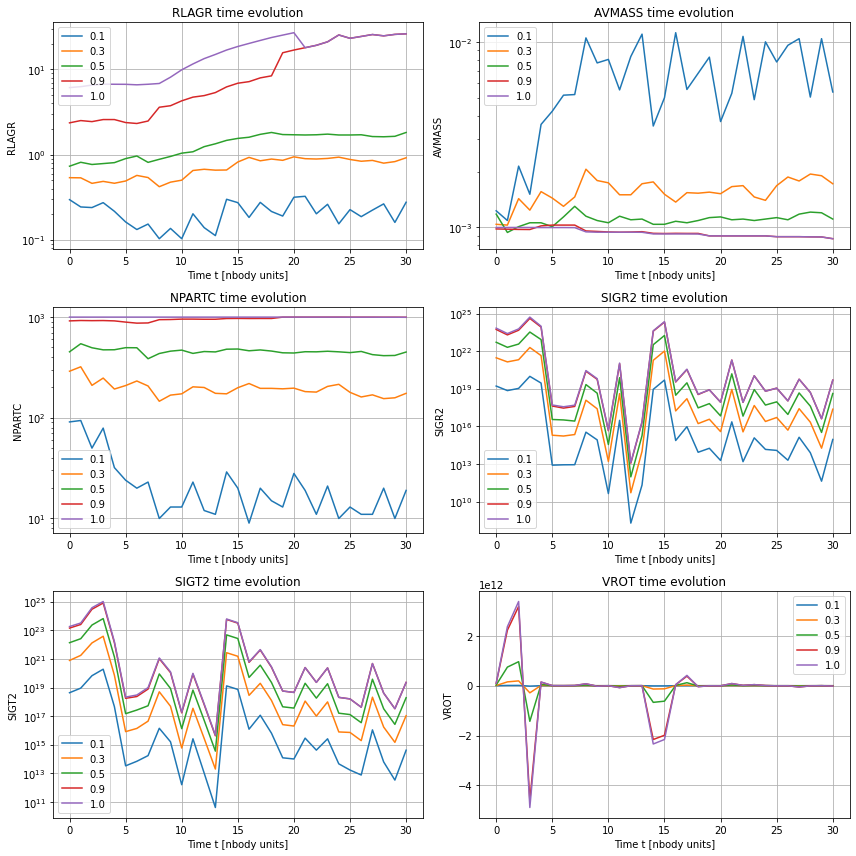

In [5]:
# Allows us to loop
PLOT_DATA = ["RLAGR", "AVMASS", "NPARTC", "SIGR2", "SIGT2", "VROT"]

# just plot the following fewer cols
COLS = [0.1, 0.3, 0.5, 0.9, 1.0]

# initialize matplotlib figure
fig = plt.figure(figsize=(12,4*len(PLOT_DATA)/2))

for pdata in PLOT_DATA:
    ax = fig.add_subplot(int(len(PLOT_DATA)/2),2,PLOT_DATA.index(pdata) + 1)
    
    # Plot the data
    data[pdata][COLS].plot(ax=ax)
    
    ax.set_title(f"{pdata} time evolution")
    ax.set_xlabel(r"Time t [nbody units]")
    ax.set_ylabel(f"{pdata}")
    ax.grid()
    if pdata != "VROT":
        ax.set_yscale("log")
    
fig.tight_layout()

# Energy from Adjust line
Looking at the main stdout file, you'll find the `ADJUST` lines, giving a lot of information about the energy. Let us extract it

    ADJUST:  TIME    0.00000E+00  T[Myr]    0.00  Q 0.50  DE   0.000E+00 DELTA   0.000E+00 DETOT   0.000E+00 E  -2.502E-01 EKIN   2.500E-01 POT   5.000E-01 ETIDE  -1.505E-04 ETOT  -2.502E-01 EBIN   0.000E+00 EMERGE   0.000E+00 ESUB   0.000E+00 ECOLL   0.000E+00 EMDOT   0.000E+00 ECDOT   0.000E+00

In [6]:
# initialize a pandas DataFrame
df = None

# work through the file
with open("example_1k/1k.out","r") as nb_stdout:
    for line in nb_stdout:
        # Match line where we get the mass fractions
        line = line.replace("*****", " nan")
        if re.search("ADJUST:", line):
            # Replace the multiple spaces by just one space
            line = re.sub("\s+", " ", line).strip()
            # After replacing the multiple spaces we can more easily split the line
            line = line.split(" ")
            
            # load dataframe
            if df is None:
                cols = [line[i] for i in range(3, len(line), 2)]
                df = pd.DataFrame(columns=cols)
            
            # Assign new row
            idx = np.float64(line[2])
            df.loc[idx] = np.float64([line[i] for i in range(4, len(line), 2)])
df

,T[Myr],Q,DE,DELTA,DETOT,E,EKIN,POT,ETIDE,ETOT,EBIN,EMERGE,ESUB,ECOLL,EMDOT,ECDOT
0.0,0.00,0.50,0.000000e+00,0.000000e+00,0.000000e+00,-0.25020,0.2500,0.5000,-0.000150,-0.2502,0.0,0.0,0.0,0.0,0.000000,0.00000
1.0,0.61,0.52,-4.289000e-09,-1.150000e-09,-1.150000e-09,-0.25010,0.2681,0.5180,-0.000147,-0.2502,0.0,0.0,0.0,0.0,-0.000037,0.00000
2.0,1.22,0.52,3.077000e-07,8.276000e-08,8.161000e-08,-0.25000,0.2689,0.5188,-0.000147,-0.2502,0.0,0.0,0.0,0.0,-0.000108,0.00000
3.0,1.82,0.50,1.454000e-07,3.675000e-08,1.184000e-07,-0.25000,0.2528,0.5026,-0.000133,-0.2502,0.0,0.0,0.0,0.0,-0.000186,0.00000
4.0,2.43,0.49,-2.213000e-08,-5.530000e-09,1.128000e-07,-0.24990,0.2384,0.4882,-0.000116,-0.2502,0.0,0.0,0.0,0.0,-0.000266,0.00000
5.0,3.04,0.51,1.435000e-08,3.725000e-09,1.166000e-07,-0.24970,0.2596,0.5093,-0.000103,-0.2502,0.0,0.0,0.0,0.0,-0.000407,0.00000
6.0,3.65,0.49,-4.267000e-07,-1.065000e-07,1.005000e-08,-0.24960,0.2390,0.4885,-0.000095,-0.2502,0.0,0.0,0.0,0.0,-0.000585,0.00000
7.0,4.25,0.54,-2.492000e-07,-7.143000e-08,-6.138000e-08,-0.24930,0.2866,0.5358,-0.000093,-0.2502,0.0,0.0,0.0,0.0,-0.000873,0.00000
8.0,4.86,0.59,-3.167000e-05,-9.156000e-06,-9.217000e-06,-0.20360,0.2891,0.4926,-0.000097,-0.2502,0.0,0.0,0.0,0.0,-0.046590,0.00000
9.0,5.47,0.56,2.437000e-07,6.306000e-08,-9.154000e-06,-0.20040,0.2588,0.4591,-0.000107,-0.2510,0.0,0.0,0.0,0.0,-0.050590,0.00000


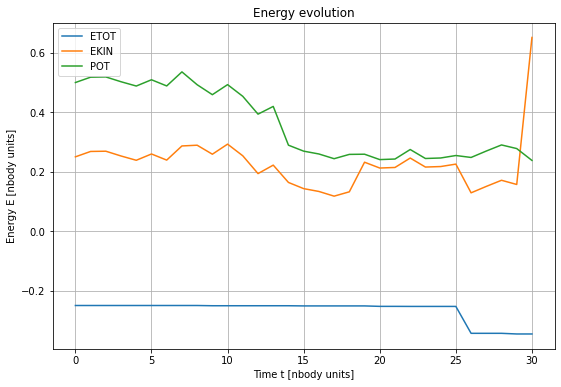

In [7]:
# We don't want it to get too messy, so let's only plot
# a few columns
COLS = ["ETOT", "EKIN", "POT"]

# Prepare plot
fig = plt.figure(figsize=(9,6))
ax = fig.gca()

# plot
df[COLS].plot(ax=ax)

# make the plot a little bit nicer
ax.set_title(r"Energy evolution")
ax.set_xlabel(r"Time t [nbody units]")
ax.set_ylabel(r"Energy E [nbody units]")
ax.grid()
#ax.set_yscale("log")